<a href="https://colab.research.google.com/github/Buzzshocker01/C-programing/blob/main/Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import torch
import pandas as pd
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


DATA PREPARING

FROM EXCEL

1.   IMAGES
2.   VIDEOS
3.   AUDIO
4.   DNA









---



---



In [55]:
#USING LINEAR REGRESSION
# Y = A + BX           WHERE B is weight X is unkown and A is bias

weight= 0.7
bias = 0.3

#create
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = X * weight + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [56]:
len(X),len(y)

(50, 50)

#Preparing data:
Spliting the data in following parts:
1. TRAINING DATA (60-80%)
2. VALIDATION SET DATA (10-20%)
3. TESTING DATA (10-20%)

In [57]:
train_split= int(0.8*len(X))         #takes 80% of X in terms of its index
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train),len(X_test), len(y_test)


(40, 40, 10, 10)

Vizualising using MATPLOT

In [58]:
def plot_prediction(train_data = X_train,train_labels=y_train,test_data=X_test,test_labels=y_test, predictions=None):

  #Plots training data and test data for comparison
  plt.figure(figsize=(10,8))
  #Plot training data in blue
  plt.scatter(train_data,train_labels, c='b',s=10, label="Training data")
  #Plot test data in green
  plt.scatter(test_data,test_labels, c='g',s=4, label="Testing data")
  #prediticion data
  if predictions is not None:
    plt.scatter(test_data,predictions,c='r',s=4, label="Predictions")

  plt.legend(prop={"size": 14});


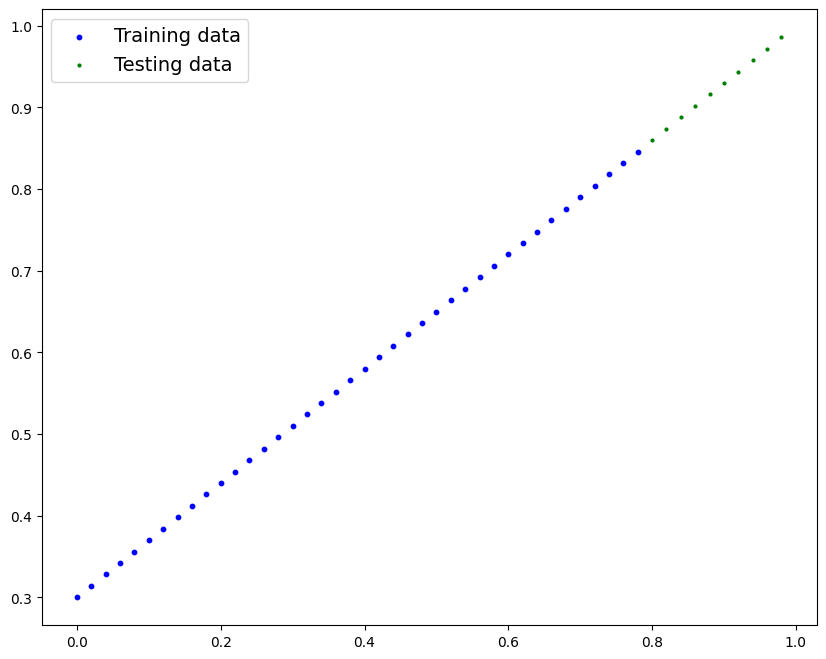

In [59]:
plot_prediction(X_train,y_train,X_test,y_test,predictions=None)

BUILDING FIRST PYTORCH MODEL

In [60]:
#Create Liner regression model class
class LinearRegressionModel(nn.Module):       #Almost everything in pytorch inherits from nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad= True,
                                         dtype=torch.float))



    #Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:   #x is the input data
    return self.weights * x + self.bias                 # this is the linear regreation formula

Pytorch Model building essentials: 5h18min
1.torch.nn

2.torch.nn.Parameters

3.torch.nn.Module

4.torch.optim

5.def forward()

In [61]:
#Creating a Random seed
torch.manual_seed(42)

#Create an instance of the model(This is a subclass of nn.module)
model_0 = LinearRegressionModel()

#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [62]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [63]:
weight,bias

(0.7, 0.3)

the closer we get to this weight and bias we achieve it
in most cases we don't know what these values are

Predicting

#Making prediction using torch.inference_mode()


To check our models predictive power, Lets see how well it predicts

In [64]:
#Make prediction with model
with torch.inference_mode():           ##inference is just prediction
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [65]:
y_test


tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [66]:
print(y_preds.shape)
print(X_test.shape)
print(y_test.shape)


torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])


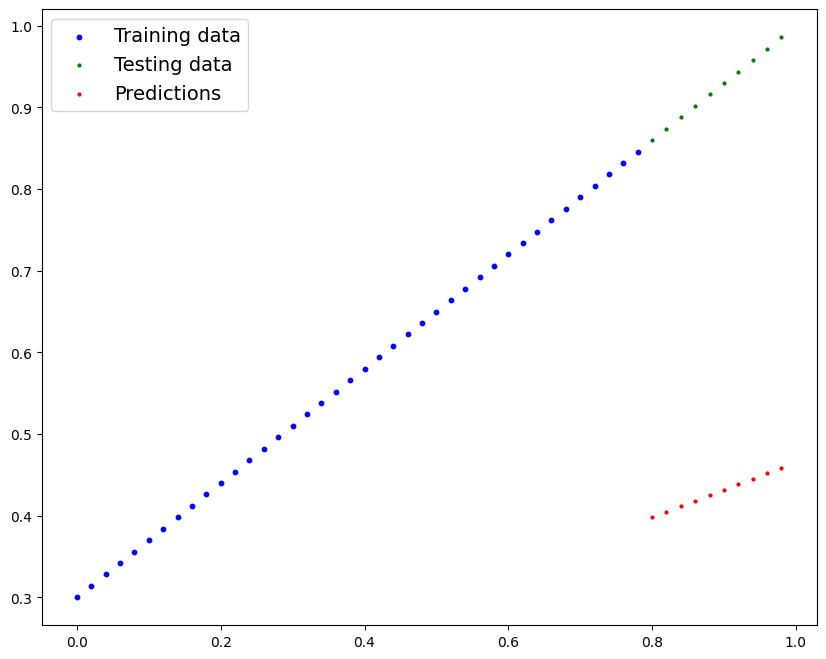

In [67]:
plot_prediction(predictions=y_preds)